#ML 스터디 7장

##신경망, 딥러닝

머신러닝(기계 학습)의 한 방법 > 딥러닝(심층 신경망)

사람의 신경 세포의 움직임을 단순화한 수학적인 모델 > 뉴런 모델(뉴런)

뉴런의 집합체 모델 >> 신경망 모델(신경망)

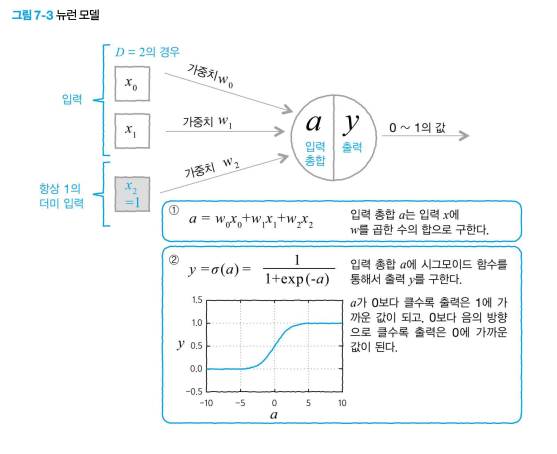

뉴런 모델은 입력 공간을 선으로 나눈다는 단순한 기능밖에 없지만 뉴런 모델을 여러개 조합한다면??
> 신경망 모델 등장

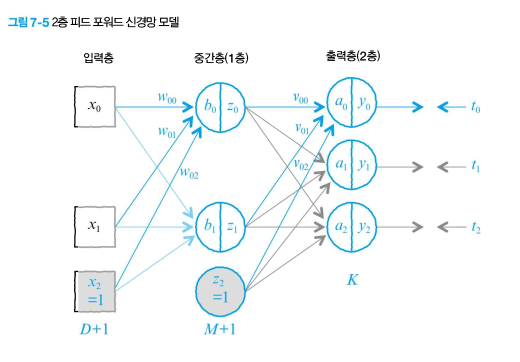

In [ ]:
#2차 피드 포워드 신경망 구현 (데이터 생성)
import numpy as np

np.random.seed(seed = 1)
N = 200
K = 3
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])
Pi = np.array([0.4, 0.8, 1])
for n in range(N):
  wk = np.random.rand()
  for k in range(K):
    if wk < Pi[k]:
      T[n, k] = 1
      break
  for k in range(2):
    X[n, k ] = np.random.randn() * Sig[T[n, :] == 1, k] + \
    Mu[T[n, :] == 1, k]

<ipython-input-2-37602ce2b15b>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n, k ] = np.random.randn() * Sig[T[n, :] == 1, k] + \


In [ ]:
#2차 피드 포워드 신경망 구현 (데이터 분류 및 저장)
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test= T[X_n_training:, :]

np.savez('class_data.npz', X_train=X_train, T_train=T_train,
         X_test=X_test, T_test=T_test,
         X_range0=X_range0, X_range1=X_range1)

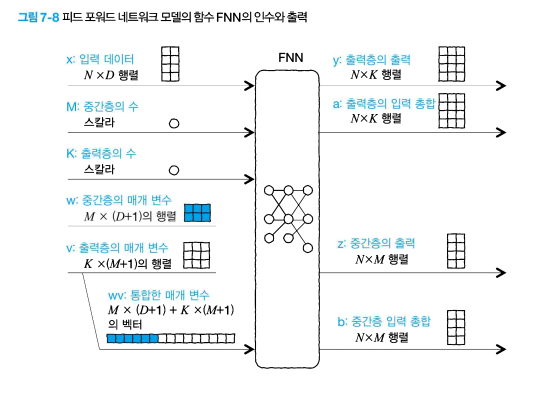

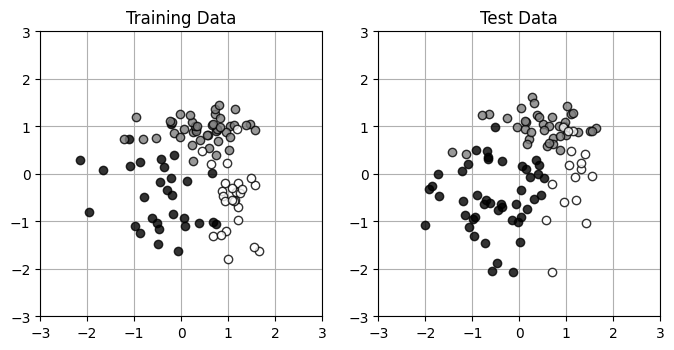

In [ ]:
#2차 피드 포워드 신경망 구현 (데이터 확인)
import matplotlib.pyplot as plt
%matplotlib inline

def Show_data(x, t):
  wk, n = t.shape
  c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
  for i in range(n):
    plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
             linestyle='none',
             marker='o', markeredgecolor='black',
             color=c[i], alpha=0.8)
  plt.grid(True)

plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

In [ ]:
#2차 피드 포워드 신경망 구현 (손실함수 및 네트워크 구조)
def Sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

def FNN(wv, M, K, x):
  N, D = x.shape
  w = wv[:M * (D + 1)]
  w = w.reshape(M, (D + 1))
  v = wv[M * (D + 1):]
  v = v.reshape((K, M+1))
  b = np.zeros((N, M + 1))
  z = np.zeros((N, M + 1))
  a = np.zeros((N, K))
  y = np.zeros((N, K))
  for n in range(N):
    for m in range(M):
      b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1])
      z[n, m] = Sigmoid(b[n, m])
    z[n, M] = 1
    wkz = 0
    for k in range(K):
      a[n, k] = np.dot(v[k, :], z[n, :])
      wkz = wkz + np.exp(a[n, k])
    for k in range(K):
      y[n, k] = np.exp(a[n, k]) / wkz
  return y, a, z, b

WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

In [ ]:
#2차 피드 포워드 신경망 구현 (손실함수 : 평균 교차 엔트로피 오차)
def CE_FNN(wv, M, K, x, t):
  N, D = x.shape
  y, a, z, b = FNN(wv, M, K, x)
  ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
  return ce

WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


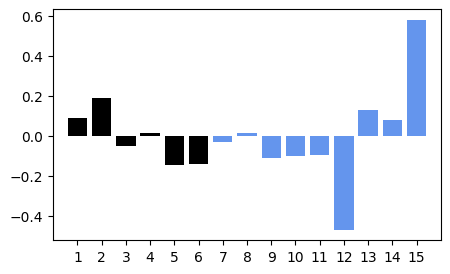

In [ ]:
#epsilon을 작게 가져가서 수치 미분을 통해 근사한 편미분을 계산하는 법
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iw in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iw] = wv[iw] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iw] = wv[iw] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iw] = (mse2 - mse1) / (2 * epsilon)
    return dwv

def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)

M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

In [ ]:
#경사 하강법
import time


def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test

startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation Time:{0:0.3f} sec".format(calculation_time))

Calculation Time:138.473 sec


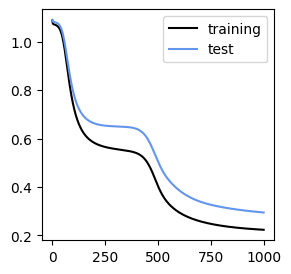

In [ ]:
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
plt.show()

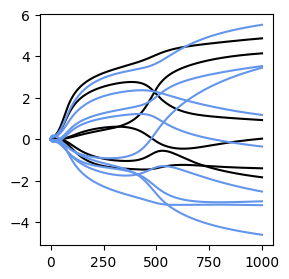

In [ ]:
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M*3], 'black')
plt.plot(WV_hist[:, M*3:], 'cornflowerblue')
plt.show()

위의 그래프에서 0 주변의 기본값으로 시작된 가중치는 각각 특정 값으로 서서히 수렴하고 있다.

그러나 자세히 살펴보면 400단계 부근에서 각각의 가중치 그래프가 교차하고 있는데, 이것은 가중치를 갱신하는 방향 즉 오차 함수의 기울기의 방향이 변화하는 것을 의미한다.

가중치가 안장점이라는 지점 근처를 통과했기 때문일지도 모른다.

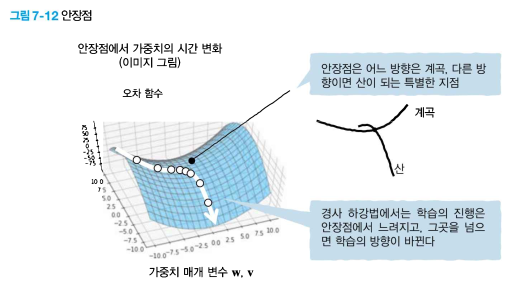

신경망에 의해 만들어지는 오차 함수의 지형은 복잡하다.

비선형성이 강한 신경망의 경우에는 학습이 수렴해도 멈추지 않고 더 노력하면 학습이 단숨에 진행되는 경우가 많습니다.

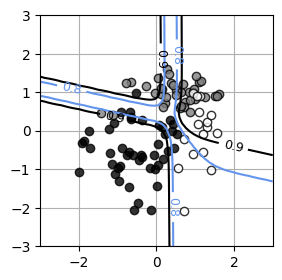

In [ ]:
def show_FNN(wv, M, K):
    xn = 60
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))] # Corrected reshape calls
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.8, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)

plt.figure(1, figsize=(3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

피드 포워드 신경망에 학습시키는 방법으로 오차 역전파법이 유명하다. 사실 이 오차 역전파법은 경사하강법이다.
> 경사 하강법을 피드 포워드 네트워크에 적용하면 오차 역전파법이 자연스럽게 도출된다.

그래서 경사하강법을 적용하여 편미분하면 학습법칙이 도출된다. 그리고 아래는 도출된 학습 법칙의 의미이다.

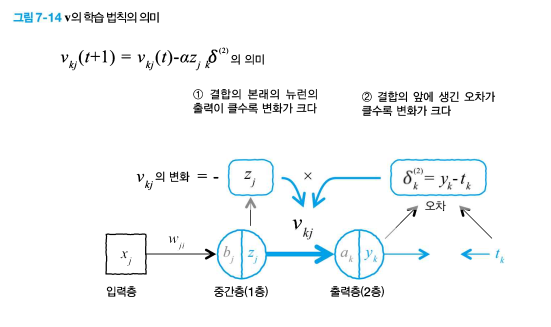

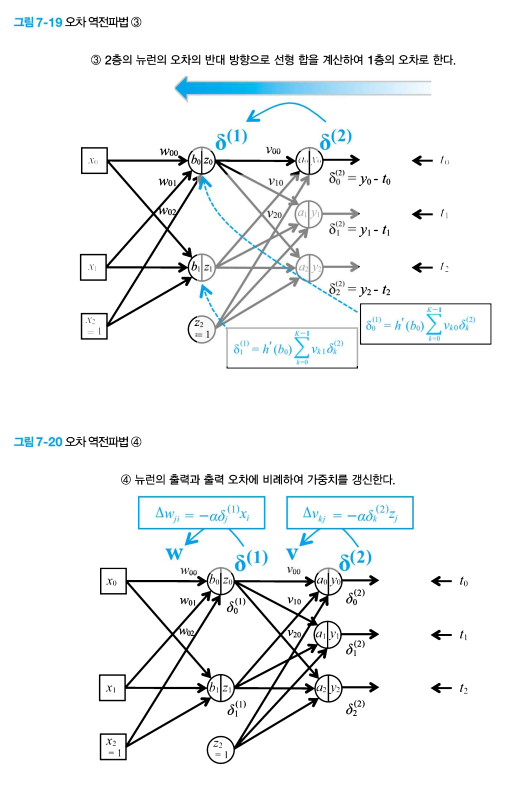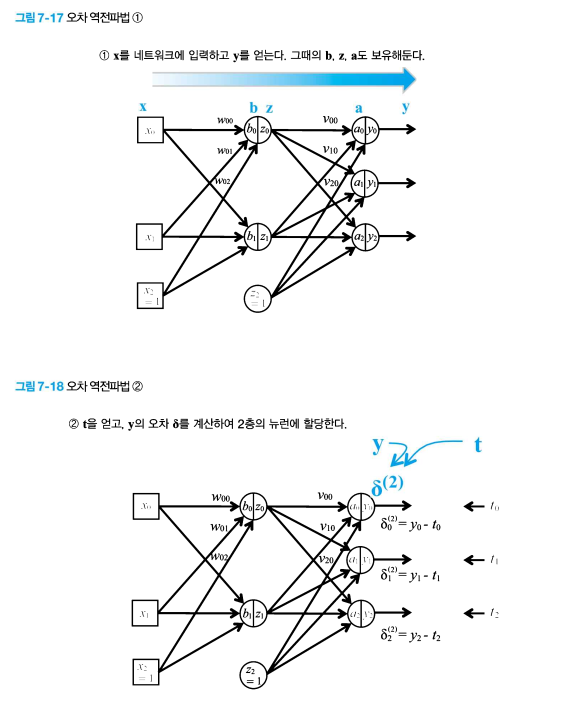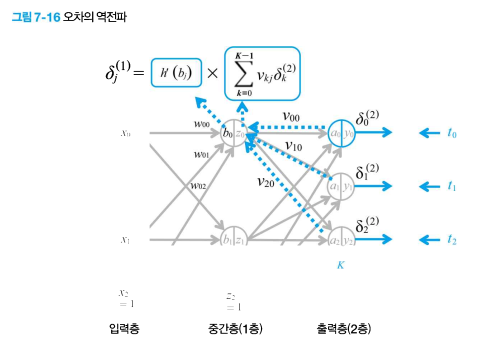

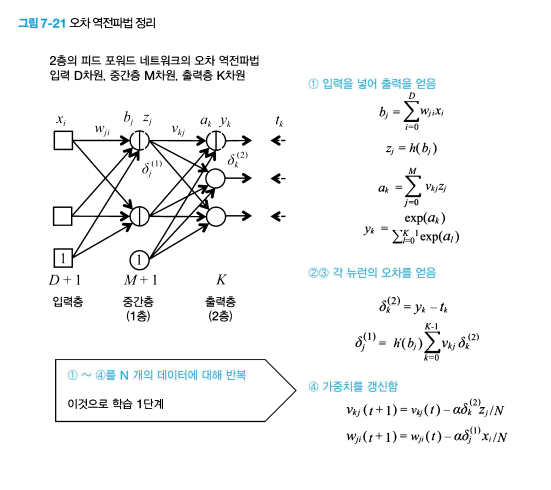

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


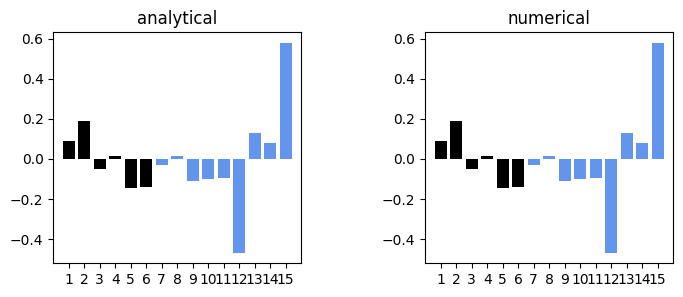

In [ ]:
#오차 역전법의 구현
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    y, a, z, b = FNN(wv, M, K, x)
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M)
    delta2 = np.zeros(K)
    for n in range(N):
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    dwv = np.c_[dw.reshape((1, M * (D + 1))), dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv

def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)

M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)

plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_WV(dWV_ana, M)
plt.title('analytical')
plt.subplot(1, 2, 2)
Show_WV(dWV_num, M)
plt.title('numerical')
plt.show()


In [ ]:
#수치 미분과 비교해서 계산속도가 훨씬 빨라짐
import time

def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test

startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:0.3f} sec".format(calculation_time))

Calculation time:20.239 sec


In [ ]:
#결과는 수치 미분때와 같음
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M*3], 'black')
plt.plot(WV_hist[:, M*3:], 'cornflowerblue')
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

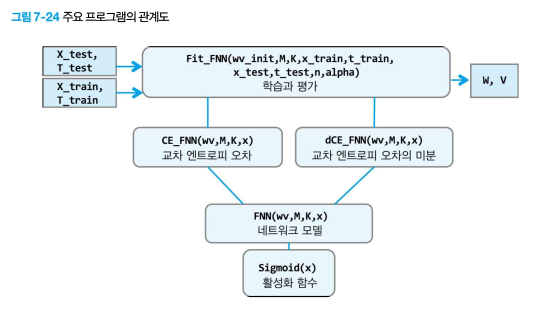

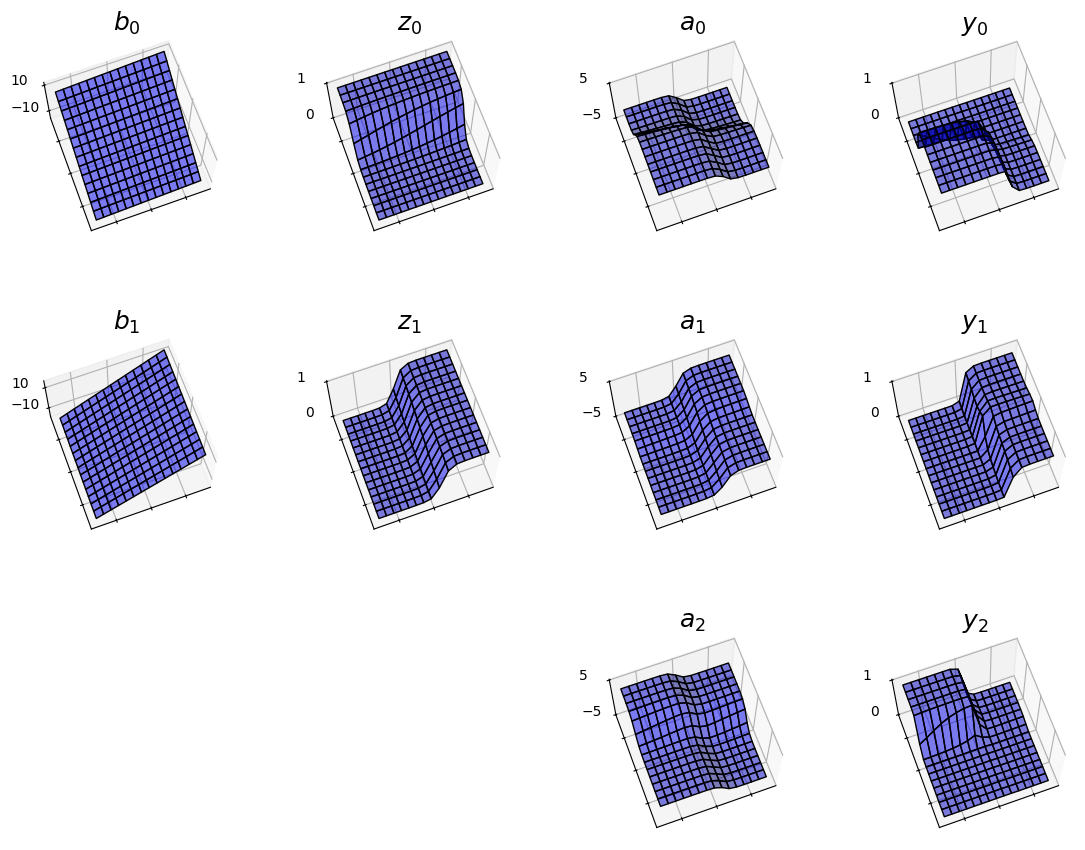

In [ ]:
#학습 후 뉴런의 특성 확인
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black',
                    rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)

M = 2
K = 3
xn = 15
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
y, a, z, b = FNN(WV, M, K, x)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))

for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))

plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


현재 신경망의 다양한 라이브러리가 출시되어 있어, 이를 사용하면 대규모 신경망이 비교적 짧은 코드로 구현되며 빠르게 동작한다. 구글에서 개발한 텐서플로가 유명하며, 아래는 케라스 라이브러리를 통해 텐서플로를 쉽게 동작시켜 2층 피드 포워드 신경망을 구현해보았다.

In [ ]:
#케라스에서 2층 피드 포워드 신경망 구현
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1)
import keras.optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation

outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [ ]:
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [0.5, 0.5, 0.5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none', marker='o',
                 markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)

In [ ]:
np.random.seed(1)

model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform'))
model.add(Dense(3, activation='softmax',
                kernel_initializer='uniform'))
sgd = keras.optimizers.SGD(learning_rate=1.0, momentum=0.0,
                           decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test))

score = model.evaluate(X_test, T_test, verbose=0)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'\
      .format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time:{0:0.3f} sec".format(calculation_time))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


cross entropy 0.26, accuracy 0.92
Calculation time:58.103 sec


cross entropy 0.26, accuracy 0.92
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


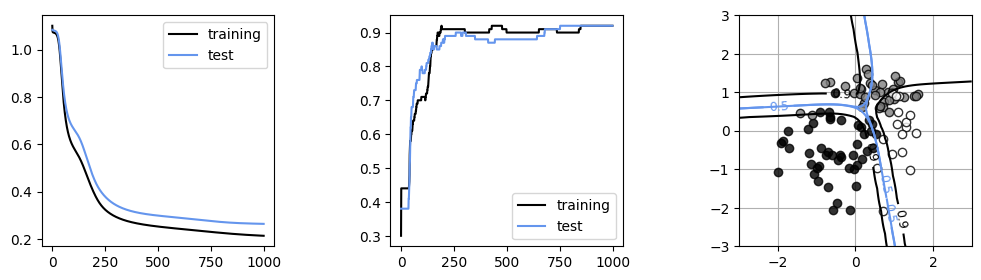

In [ ]:
score = model.evaluate(X_test, T_test, verbose=0)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'\
      .format(score[0], score[1]))

plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='training')
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label='training')
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label='test')
plt.legend()

plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
y = model.predict(x)
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=[
        'cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()